In [ ]:
!pip install scikit-image
!pip install scikit-learn
!pip install jupyterlab
!pip install matplotlib
!pip install numpy
!pip install opencv-python==4.3.0.36

****************************************************
****************************************************
****************************************************
****************************************************
****************************************************
****************************************************


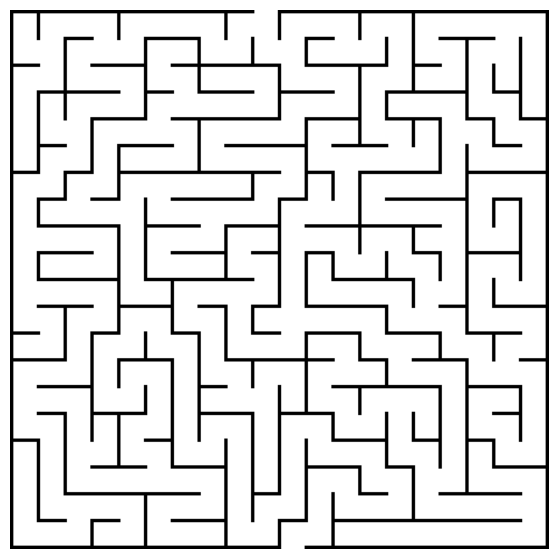

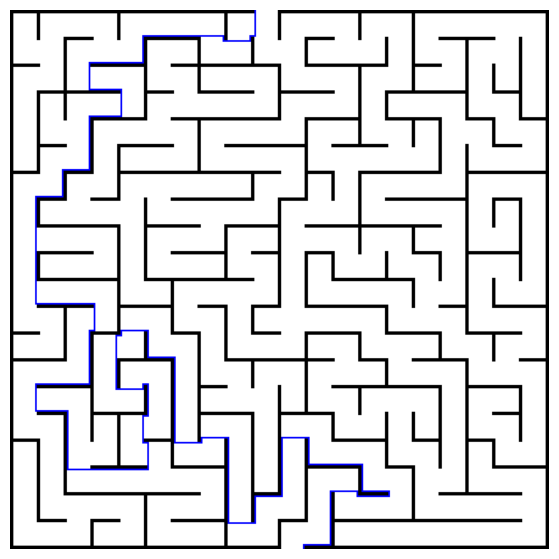

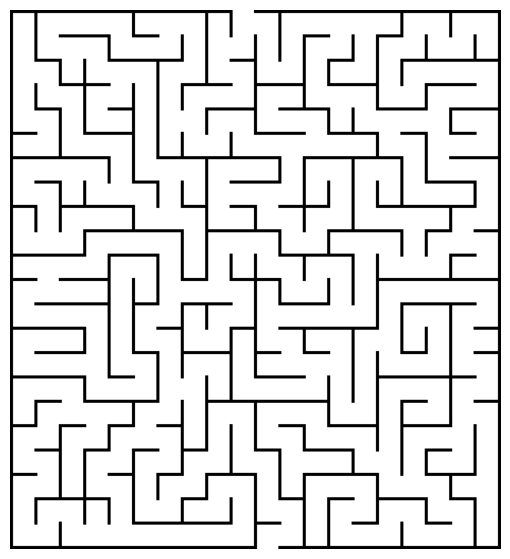

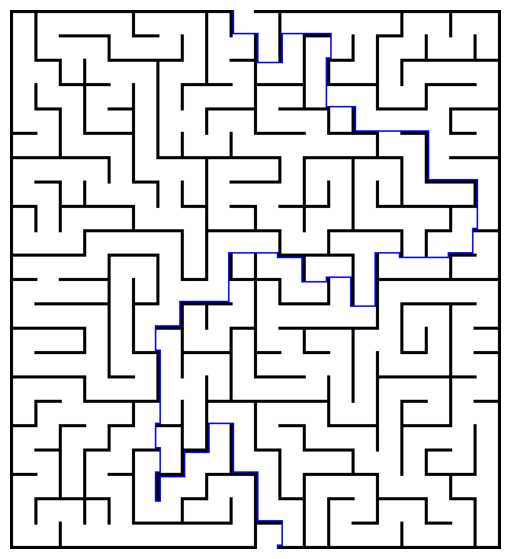

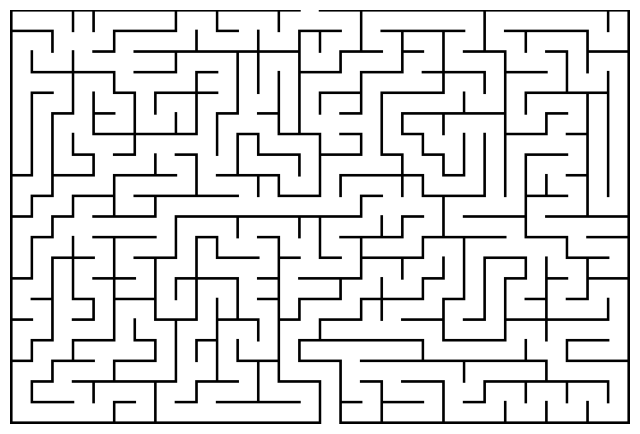

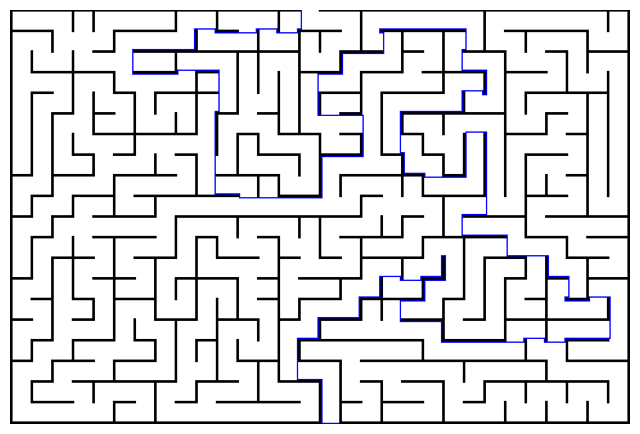

In [16]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.

    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))

    axs.imshow(image)
    axs.axis('off')
    plt.plot()

def find_way_from_maze(image: np.ndarray) -> tuple:
    """
    Найти путь через лабиринт.

    :param image: изображение лабиринта
    :return: координаты пути из лабиринта в виде (x, y), где x и y - это массивы координат
    """
    coords = None
    # Ваш код тут
    # Получаем бинарную маску
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    height, width = binary.shape
    # Чтобы начать алгоритм поиска, нам нужен вход и выход
    start, end = find_start_and_end(binary)
    if start is None or end is None:
        print("Нет входа или выхода")
        return None
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    # Алгоритм будет реализован через очередь
    queue = deque([start])
    visited = set()
    visited.add(start)
    # Запишем сюда ребенок -> родитель (две подряд идущие ячейки нашего пути)
    parent = {start: None}

    while queue:
        current = queue.popleft()
        # Если нашли выход, то выходим
        if current == end:
            break
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            # Если не вышли за пределы картинки и попали в белую ячейку
            # и не были еще в этой клетке, то записываем её в массив посещенных клеток
            # в очередь для дальнейшей проверки и её родителя
            if (0 <= neighbor[0] < height and
                0 <= neighbor[1] < width and
                binary[neighbor] == 0 and
                neighbor not in visited):
                visited.add(neighbor)
                queue.append(neighbor)
                parent[neighbor] = current
    # Восстановление пути от конца к началу
    coords = []
    step = end
    while step is not None:
        coords.append(step)
        step = parent.get(step)
    coords.reverse()
    x_coords, y_coords = ([], [])
    if coords:
        x_coords, y_coords = zip(*coords)
    return (x_coords, y_coords)

def find_start_and_end(binary: np.ndarray) -> tuple:
    """
    Найти вход и выход из лабиринта в координатах

    :param binary: бинарное изображение лабиринта
    :return: вход и выход в коррдинатах
    """
    start = None
    end = None

    for i in range(binary.shape[0]):
        for j in range(binary.shape[1]):
            if binary[i, j] == 0:
                start = (i, j)
                break
        if start is not None:
            break

    for i in range(binary.shape[0]-1, -1, -1):
        for j in range(binary.shape[1]-1, -1, -1):
            if binary[i, j] == 0:
                end = (i, j)
                break
        if end is not None:
            break

    return start, end

def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении.
    Вспомогательная функция.

    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами
    """
    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    img_wpath = image.copy()
    if coords:
        x, y = coords
        img_wpath[x, y, :] = [0, 0, 255]

    return img_wpath

# Загрузка тестового изображения и выполнение функций
test_image = cv2.imread('20 by 20 orthogonal maze.png')  # загрузить тестовую картинку
plot_one_image(test_image)
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт
image_with_way = plot_maze_path(test_image, way_coords)
plot_one_image(image_with_way)

test_image = cv2.imread('20 by 22 orthogonal maze.png')  # загрузить тестовую картинку
plot_one_image(test_image)
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт
image_with_way = plot_maze_path(test_image, way_coords)
plot_one_image(image_with_way)

test_image = cv2.imread('30 by 20 orthogonal maze.png')  # загрузить тестовую картинку
plot_one_image(test_image)
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт
image_with_way = plot_maze_path(test_image, way_coords)
plot_one_image(image_with_way)